# Individual Assignment at OSA21

these are vital functions I will use later on.

In [3]:
def draw_partition(G,partition,pos=None,color_scheme=None, labels=False): 
    ''' draw_partition - draws the graph with different partitions in different shades
    
    Arguments: 
        graph [required]: A graph / digraph / multigraph, attributes 
        partition: a dictionary of {<node_name>:community} 
        
    Returns: A dictionary where node name is key and partition number is value.  
    '''    

    #drawing
    size = float(len(set(partition.values())))
    if pos == None:
        pos = nx.spring_layout(G)

    for count,comm in enumerate( set(partition.values()) ):
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == comm]
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color =np.random.random(3))#str(count / size))

    if labels:
        nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.axis("off")
    plt.show()
def try_int(num):   
    try:
        return int(num)
    except TypeError: 
        return pd.NA

def make_posts_df(df_path,COLS,set_index_col=False): #A more generalized ver. of params
    """Helper function for turning StackExchange XML into DataFrame"""
    
    text = open(df_path,'rb').read().decode("utf-8")

    print("Text loaded")
    soup = bs4.BeautifulSoup(text, "lxml")
    print("Soup processed")

    rows = []
    for c,i in enumerate(soup.find_all('row')):
        if c%5000 == 0: print("Processing row {}".format(c))
    
        temprow = []
        for key in COLS: 
            if key in i.attrs:  
                temprow.append(i.attrs[key])
            else:               
                temprow.append(np.nan)
                
        rows.append(temprow)

    stack_df = pd.DataFrame(rows,columns = COLS)

    if set_index_col: 
        stack_df.set_index(stack_df[set_index_col],inplace=True,drop=True)

    return stack_df

I want to analysis the users' behaviours in  stack exchange's site called [linguistics](linguistics.stackexchange.com) and learn about which users create the mainly posts and which type of posts is appreciated by users.Here are my ideas and codes.First,I download the information from  [archive](https://archive.org/download/stackexchange) and  extract the useful datas from Posts.xml and  Users.xml

In [4]:
from os import sep
import bs4 
import numpy as np
import pandas as pd
# We assume here that the file is small enough to be held in RAM. 
# Larger files will need a more piecemeal approach, 
# which might be a challenge for XML given that it expects closing tags
# (which might have megabytes or gigabtyes of text between <tag> and </tag>)
posts_path = f"oxfordData{sep}Posts.xml"

COLS_posts = ['creationdate', 'id', 'owneruserid', 'parentid', 'viewcount',
       'posttypeid', 'score', 'tags', 'lastactivitydate','commentcount' ]

posts_df = make_posts_df(posts_path,COLS_posts,set_index_col=False)

print(len(posts_df))

Text loaded
Soup processed
Processing row 0
Processing row 5000
Processing row 10000
Processing row 15000
Processing row 20000
22909


let's take a look at the data about users and posts.

In [5]:
posts_df.head()
# posts_df['tags'][0]

,creationdate,id,owneruserid,parentid,viewcount,posttypeid,score,tags,lastactivitydate,commentcount
0,2011-09-13T20:54:16.650,1,9,NaN,4033,1,18,<phonetics><cross-linguistic><production><arti...,2012-04-21T07:50:58.293,2
1,2011-09-13T20:56:33.800,2,8,NaN,1222,1,16,<morphology><sino-tibetan>,2014-11-26T13:53:35.883,3
2,2011-09-13T21:04:33.437,3,20,NaN,3269,1,32,<interlinear-gloss>,2016-08-20T09:53:39.963,5
3,2011-09-13T21:08:02.630,4,28,NaN,4312,1,6,<cross-linguistic><examples><variation>,2011-09-14T17:20:09.470,15
4,2011-09-13T21:11:08.183,5,43,NaN,3837,1,28,<syntax><comparative-linguistics><articles><na...,2018-06-20T14:29:04.093,10


here are the steps to extract data from Users.xml,same to  above steps.

In [9]:
users_path = f"oxfordData{sep}Users.xml"

COLS_users = ['id',  'reputation', 'creationdate', 'displayname',
       'aboutme', 'views', 'upvotes', 'accountid']

users_df = make_posts_df(users_path,COLS_users,set_index_col=False)

Text loaded
Soup processed
Processing row 0
Processing row 5000
Processing row 10000
Processing row 15000


In [13]:
users_df.head(10)

,id,reputation,creationdate,displayname,aboutme,views,upvotes,accountid
0,-1,1,2011-09-13T19:57:29.383,Community,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",1,754,-1
1,2,101,2011-09-13T20:18:26.800,Nick Craver,<p>I am the Architecture Lead for Stack Overfl...,6,0,7598
2,3,101,2011-09-13T20:21:42.460,Geoff Dalgas,<p>Developer on the Stack Overflow team. Find...,6,0,2
3,4,4129,2011-09-13T20:24:01.087,Mitch,<p>Native speaker of American English (AmE) wi...,303,1209,167219
4,5,101,2011-09-13T20:28:37.863,Emmett,"<p>co-founder of <a href=""https://airtable.com...",2,0,1998
5,6,101,2011-09-13T20:34:32.080,Jarrod Dixon,"<p><a href=""http://blog.stackoverflow.com/2009...",1,0,3
6,7,101,2011-09-13T20:47:41.217,Kevin Montrose,"<p><a href=""http://blog.stackoverflow.com/2010...",2,4,29738
7,8,1382,2011-09-13T20:51:06.267,Peter Olson,<p><strong>Projects</strong></p>\n\n<ul>\n<li>...,38,20,262054
8,9,1604,2011-09-13T20:51:36.750,Steven,NaN,286,13,69900
9,10,381,2011-09-13T20:51:45.853,Alan C,NaN,31,4,508507


Secondly, I extract the tags on the  posts and associate them with the user who raise that post.I must be careful because a tag can have more than one tag (the posts without tags are droped). I use directed graph the describe this procedure,It is a two-mode graph, each edge's source is always user and its target is tag. because of the reason mentioned above，The number of edges per post provide depends on the the number of tags on it.For example,according to the first post,its owneruserid is '9' and the tags on it are phonetics、cross-linguistic、production、articulation and stops, which means I will form 5 edges from  owneruserid to each tags.

In [15]:
import networkx as nx
tagsAll=[]


tags_and_ownId=posts_df[['tags','owneruserid']].dropna()
tags_and_ownId['tags']=tags_and_ownId['tags'].map(lambda x :x[1:-1].split('><'))
posts_df['id']=posts_df['id'].map(lambda x:try_int(x))
for eachlist in tags_and_ownId['tags']:
    tagsAll+=eachlist
DG = nx.DiGraph()
DG.add_nodes_from(list(tags_and_ownId['owneruserid']),attr='user')
DG.add_nodes_from(list(tagsAll),attr='tags')
for union in zip(tags_and_ownId['owneruserid'],tags_and_ownId['tags']):
        for  tag in union[1]:
            DG.add_edge(union[0],tag)
tagsAll=(set(tagsAll))
nx.write_graphml(DG,'g.graphml')

the following picture is the result used by  Gephi. the size of label on the nodes depends on the numbers of indegree. The user's label is hidden because users' name doesn't matter.
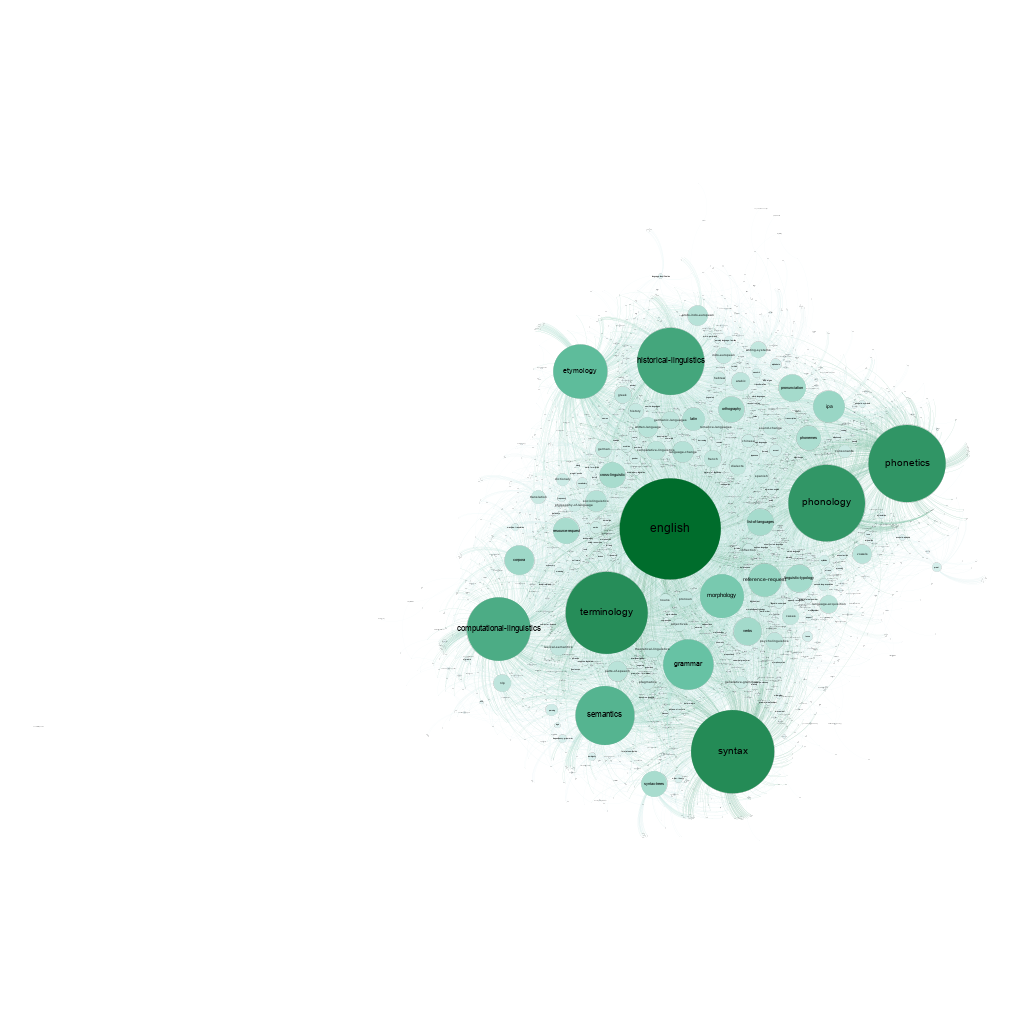

according the the picture above, we can see the more  node's indegrees, the larger label on it, which  corresponds to the following data.For example, the  most common tag is english ,whose indegree is 593,and it has the biggest label in the picture.

In [16]:
df=pd.DataFrame(DG.in_degree(),columns=['name','indegree']) 
df=df[df['indegree']>0]
indegreeDF=df.sort_values(by='indegree',ascending=False)
indegreeDF.head(10)
# DG = nx.DiGraph()
# DG.add_nodes_from(list(tags_and_ownId['owneruserid']),attr='user')
# DG.add_nodes_from(list(tagsAll),attr='tags')

,name,indegree
3890,english,593
3860,syntax,488
3872,terminology,481
3850,phonetics,452
3868,phonology,449
3892,historical-linguistics,393
3875,computational-linguistics,372
3928,semantics,345
3882,etymology,317
3879,grammar,294


there is a law called Pareto‘s principle，which means that 80% of consequences come from 20% of the causes, asserting an unequal relationship between inputs and outputs.Here I want to exam this law on the stack exchange's site. First of all, I got total number of tags.

In [17]:
print('Total number of tags:',len(tagsAll))

Total number of tags: 586


then I get the indegree number more  than zero and its corresponding name,because the nodes whose indegree equals to zero mean the users. Then I arrange in ascending order according to the number of indegree.let's have a look .

Here is the total number of the indegree

In [18]:
ingree_all=indegreeDF['indegree'].sum()
ingree_all

17442

I want to check  top 20% in DataFrame called indegreeDF，which means Top 20% points according to numbers of indegree.Then I got Top 20% points' total number of indegree.becase 586  $\times$ 20% =117，so I select indegrees of the first 117 tags.


In [19]:
ingree_top117=indegreeDF.iloc[:117]['indegree'].sum()
ingree_top117

12579

the sum of indegrees of the first 117 tags  is 12579.It divided by total number of all indegree  equals to 70.88%, which result similar to the Pareto‘s principle. The first 20% tags own the 70.88% of indegrees, which means most posts revolve around 20% of the tags.Only a small number of users participated in the discussion

In [20]:
users_df_len=len(set(users_df['id']))
posts_df_user_len=len(set(posts_df['owneruserid']))
print('the percentage of users who have posted：',posts_df_user_len/users_df_len)

the percentage of users who have posted： 0.2837655601659751


the percentage of users who have posted is just 28%, which means most users are inactive users.

## community detection
I want to chect if there are  communities. First I just detect community in the two-mode graph.But the picture  show the division of communities Vaguely.

In [162]:
import community
ung = DG.to_undirected()
partition = community.best_partition(ung)

The modularity of two-mode graph is 0.373, not bad.

In [164]:
print("The modularity by Louvain (best) is: {:.3f}".format( community.modularity(partition,ung)))

The modularity by Louvain (best) is: 0.373


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

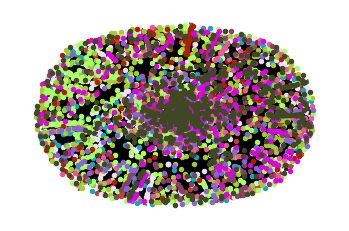

In [112]:
draw_partition(DG,partition)

Because the picture drawn by networkx is a little confused, I use gephi to redraw it, the following picture is the result.In this picture, we can clearly see which tags are divided into the same community, which means these tags are mentioned at the same time,such as 'english' and 'grammar'
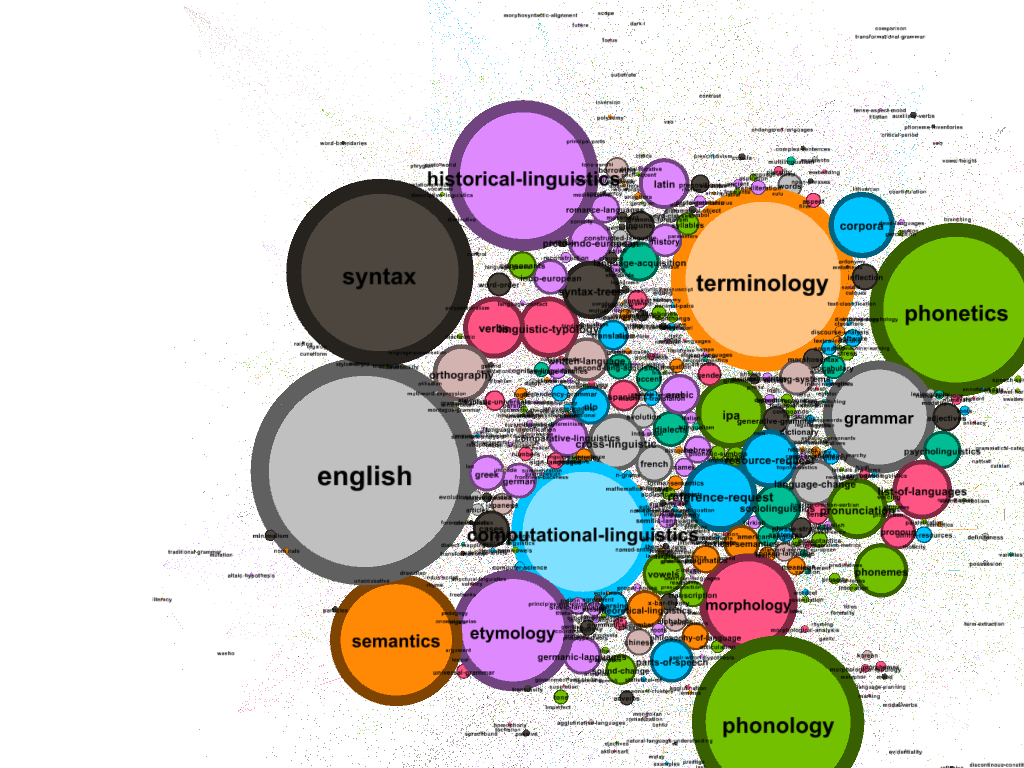

Then I project the two-mode graph into one-mode space.

In [140]:
remove = [node for node,degree in dict(DG.degree()).items() if degree < 2]
DG.remove_nodes_from(remove)
u,p=nx.bipartite.basic.sets(DG)
from networkx.algorithms import bipartite as bp 
g2 = nx.Graph(DG)
g = bp.weighted_projected_graph(g2, u)

The modularity of one-mode graph is 0.253, it's a little low.But from the picture, the community division is obvious，we can clearly see that communities are divided into several categories.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

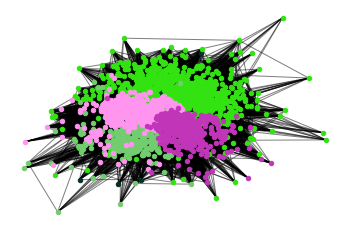

The modularity by Louvain (best) is: 0.253


In [146]:
partition = community.best_partition(g)
draw_partition(g, partition)
print("The modularity by Louvain (best) is: {:.3f}".format( community.modularity(partition,g)))

In summary, I check the Pareto‘s principle using Stack exchange's site and visualize the community about one-mode graph and two-mode graph. 